### Introduction to Matplotlib

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

[]

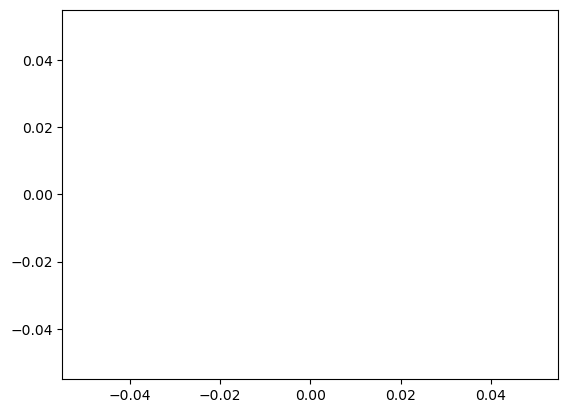

In [2]:
plt.plot()

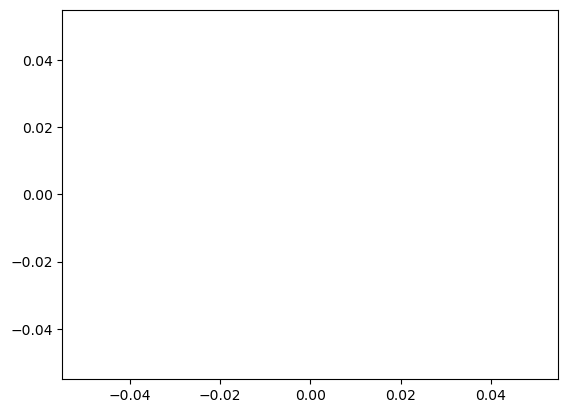

In [3]:
plt.plot(); #or plt.plot() adnd plt.show()

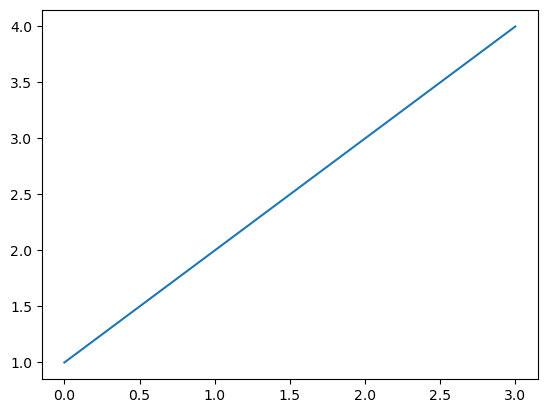

In [4]:
plt.plot([1,2,3,4]);

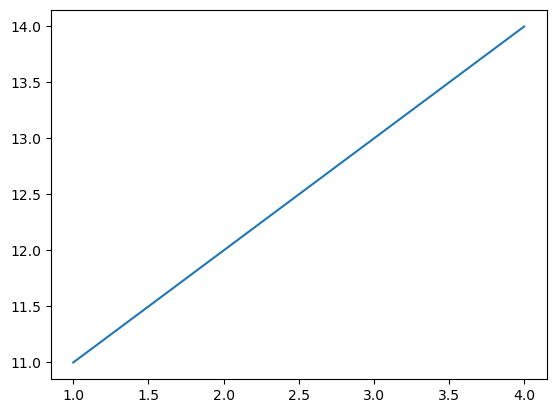

In [5]:
x = [1, 2, 3, 4]
y = [11, 12, 13, 14]
plt.plot(x,y); #stateless way of plotting

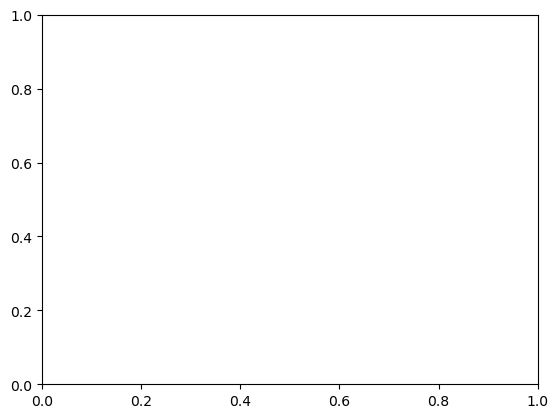

In [6]:
# method 1
fig = plt.figure() # creates a figure
ax = fig.add_subplot() # ads some axes
plt.show()

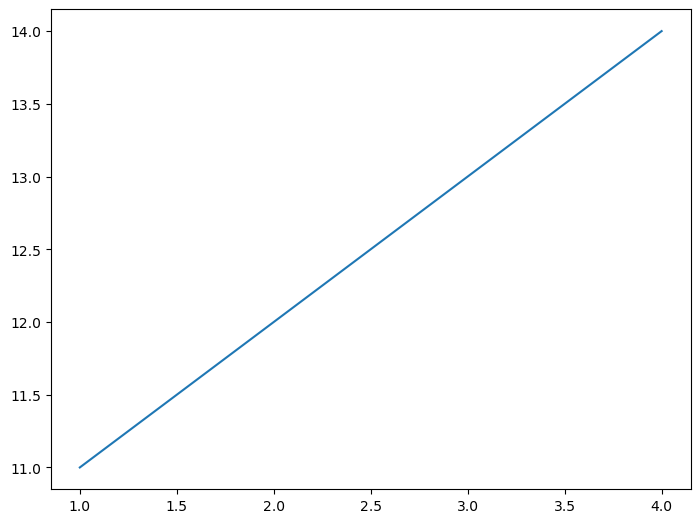

In [7]:
#method 2
fig = plt.figure() #creates a figure
ax = fig.add_axes([1, 1,1,1])
ax.plot(x,y) #adds data
plt.show()

(matplotlib.figure.Figure, matplotlib.axes._axes.Axes)

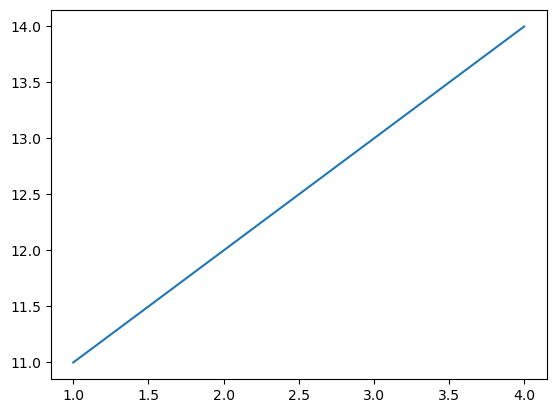

In [8]:
#method 3 -  recommended
fig, ax = plt.subplots()
ax.plot(x, y);
type(fig),type(ax)

### matplotlib example workflow

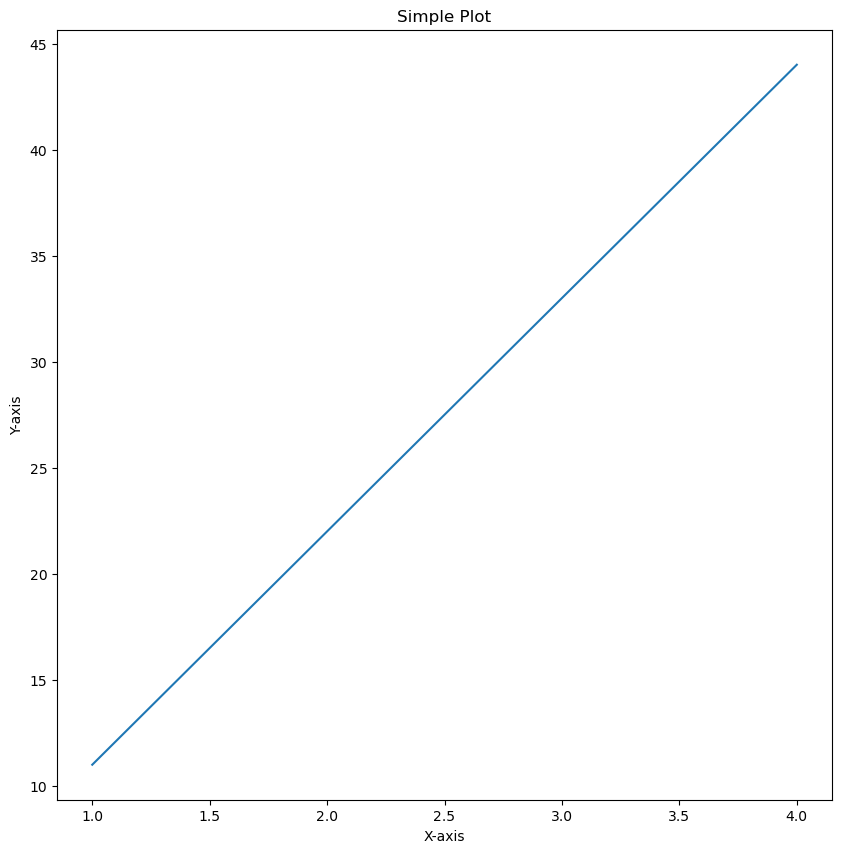

In [9]:
# 0.import matplotlib and get it ready for plotting in Jupyter

%matplotlib inline
import matplotlib.pyplot as plt

#1. prepare the data
x = [1, 2, 3, 4]
y = [11, 22,33,44]

# 2. setup plot
fig,ax=plt.subplots(figsize=(10,10))

# 3.plot data
ax.plot(x,y)

# 4.customize plot
ax.set(title='Simple Plot', xlabel='X-axis', ylabel='Y-axis')

# 5. save and show(save the whole figure)
fig.savefig('sample-plot.png')


### Making figure with NumPy arrays

we want:
* Line Plot
* Scatter plot
* Bar Plot
* Histogram
* Subplots

In [10]:
import numpy as np

In [11]:
x = np.linspace(0,10,10)
x

array([ 0.        ,  1.11111111,  2.22222222,  3.33333333,  4.44444444,
        5.55555556,  6.66666667,  7.77777778,  8.88888889, 10.        ])

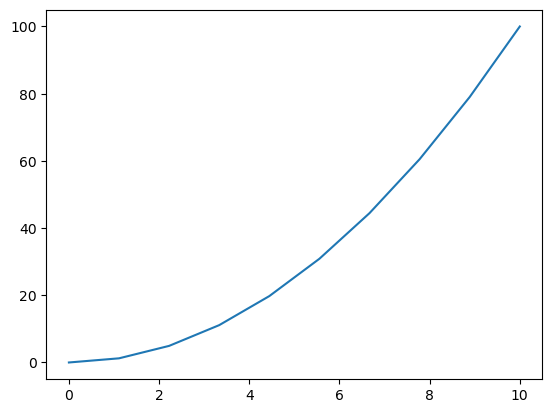

In [12]:
#plot the data and create a line plot

fig,ax=plt.subplots()
ax.plot(x,x**2)

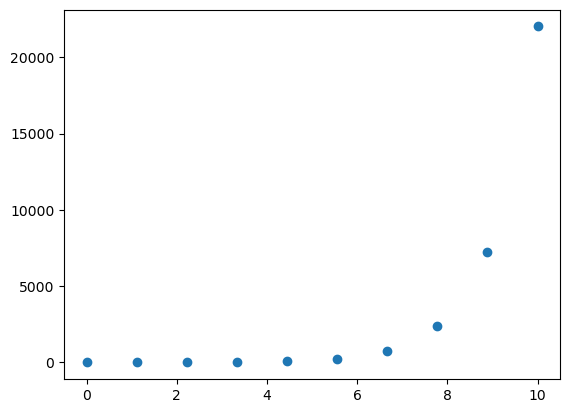

In [13]:
#create a scatter plot using the same data
fig, ax=plt.subplots()
ax.scatter(x, np.exp(x))

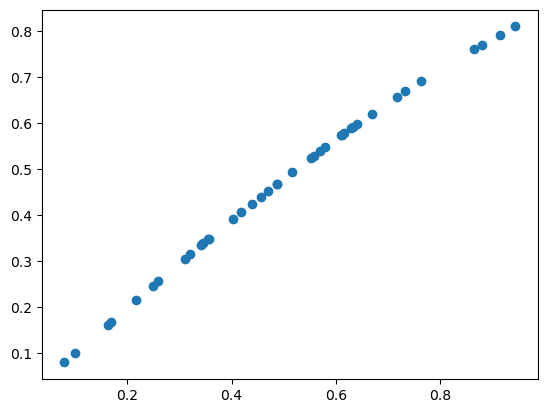

In [54]:
fig, ax=plt.subplots()
ax.scatter(x,np.sin(x))

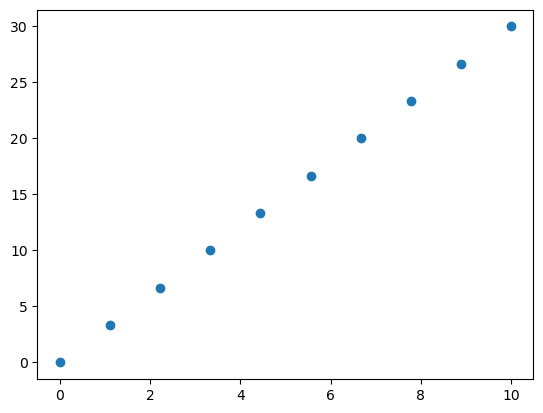

In [15]:
fig, ax=plt.subplots()
ax.scatter(x,x*3)

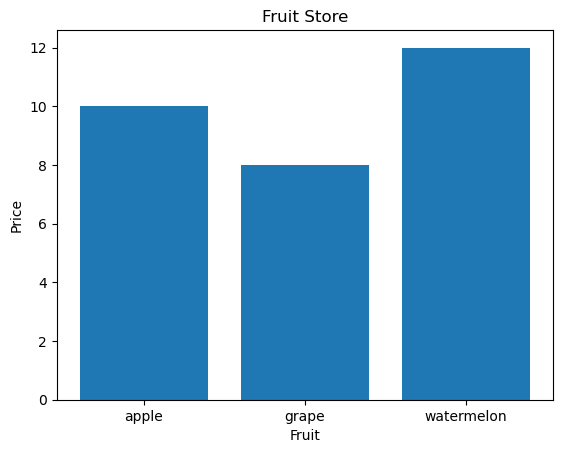

In [16]:
#fruits
fruits={'apple':10, 'grape':8, 'watermelon':12}

fig,ax=plt.subplots()
ax.bar(fruits.keys(),fruits.values())
ax.set(title='Fruit Store',xlabel='Fruit',ylabel='Price');

<BarContainer object of 3 artists>

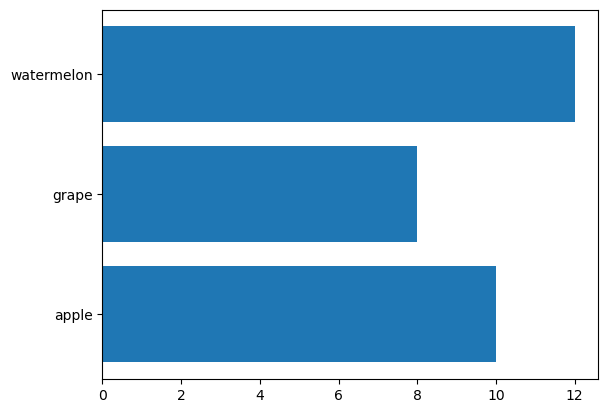

In [17]:
fig, ax=plt.subplots()
ax.barh(list(fruits.keys()),fruits.values())

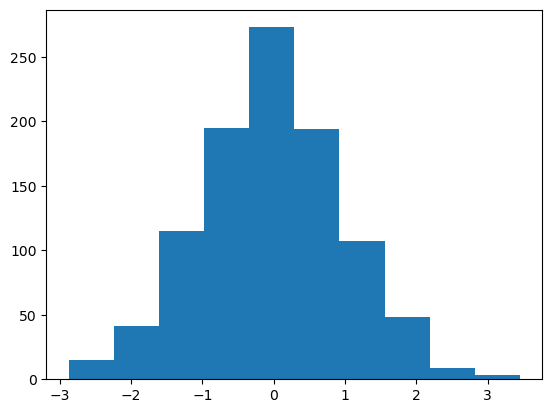

In [18]:
#making data for a histogram

x = np.random.randn(1000)
fig, ax=plt.subplots()
ax.hist(x);

### Two options for getting multiple plots

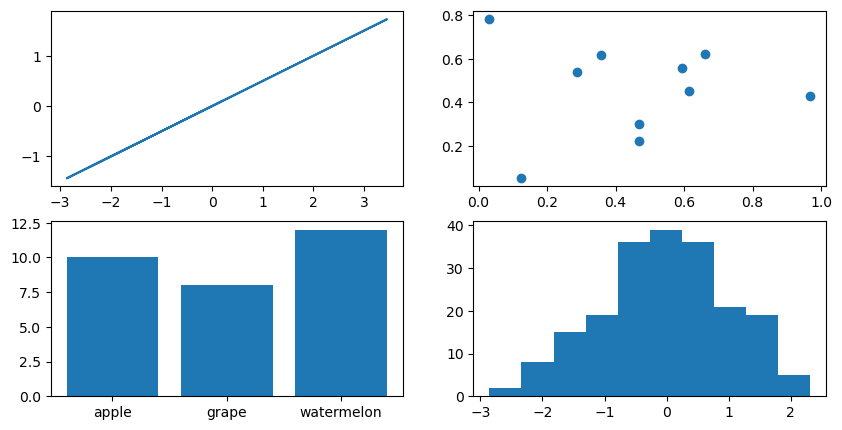

In [19]:
#subplot option 1
fig, ((ax1,ax2) , (ax3,ax4)) = plt.subplots(nrows=2, ncols=2, figsize=(10,5))

ax1.plot(x,x/2);
ax2.scatter(np.random.random(10),np.random.random(10));
ax3.bar(fruits.keys(),fruits.values());
ax4.hist(np.random.randn(200));

(array([  4.,   7.,  54., 122., 199., 251., 225., 103.,  27.,   8.]),
 array([-3.46224435, -2.8118474 , -2.16145045, -1.5110535 , -0.86065656,
        -0.21025961,  0.44013734,  1.09053429,  1.74093124,  2.39132818,
         3.04172513]),
 <BarContainer object of 10 artists>)

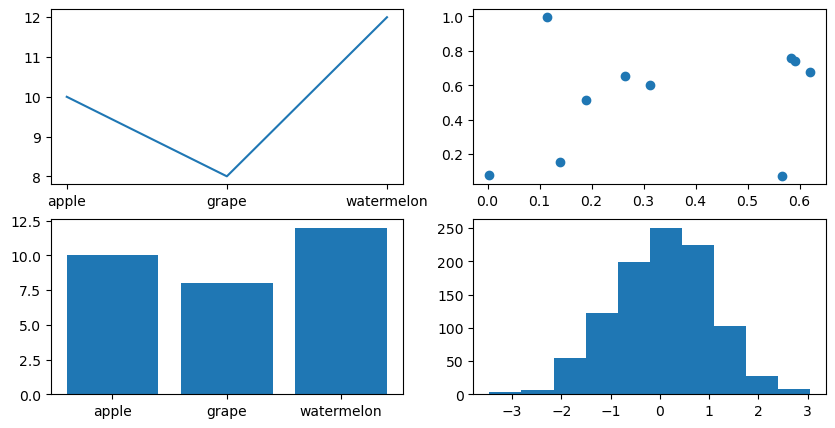

In [20]:
#subplots option 2
fig, ax=plt.subplots(nrows=2,ncols=2,figsize=(10,5))

#plot to each diff index
ax[0,0].plot(fruits.keys(),fruits.values())
ax[0,1].scatter(np.random.random(10),np.random.random(10))
ax[1,0].bar(fruits.keys(),fruits.values())
ax[1,1].hist(np.random.randn(1000))

### Plotting from pandas dataframes

In [21]:
# make a dataframe
import pandas as pd
cars = pd.read_csv('car-sales.csv')

In [22]:
cars.head()

,Make,Colour,Odometer (KM),Doors,Price
0,Toyota,White,150043,4,"$4,000.00"
1,Honda,Red,87899,4,"$5,000.00"
2,Toyota,Blue,32549,3,"$7,000.00"
3,BMW,Black,11179,5,"$22,000.00"
4,Nissan,White,213095,4,"$3,500.00"


<Axes: >

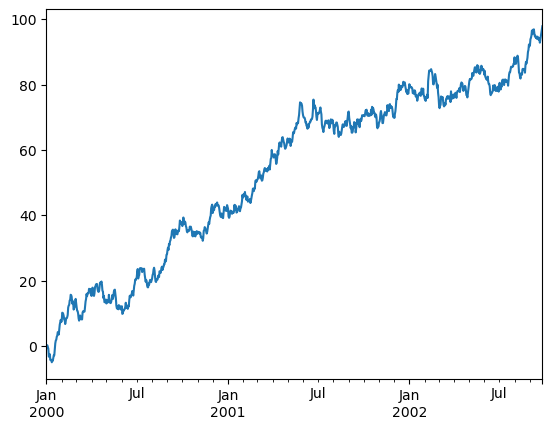

In [23]:
ts = pd.Series(np.random.randn(1000),index=pd.date_range('1/1/2000',periods=1000))
ts=ts.cumsum()
ts.plot()

In [24]:
cars['Price']= cars['Price'].str.replace('[\$\,\.]','',regex=True)
cars

,Make,Colour,Odometer (KM),Doors,Price
0,Toyota,White,150043,4,400000
1,Honda,Red,87899,4,500000
2,Toyota,Blue,32549,3,700000
3,BMW,Black,11179,5,2200000
4,Nissan,White,213095,4,350000
5,Toyota,Green,99213,4,450000
6,Honda,Blue,45698,4,750000
7,Honda,Blue,54738,4,700000
8,Toyota,White,60000,4,625000
9,Nissan,White,31600,4,970000


In [25]:
type(cars.Price)

pandas.core.series.Series

In [26]:
#remove last 2 zeroes from Price
cars["Price"] = cars["Price"].str[:-2]
cars

,Make,Colour,Odometer (KM),Doors,Price
0,Toyota,White,150043,4,4000
1,Honda,Red,87899,4,5000
2,Toyota,Blue,32549,3,7000
3,BMW,Black,11179,5,22000
4,Nissan,White,213095,4,3500
5,Toyota,Green,99213,4,4500
6,Honda,Blue,45698,4,7500
7,Honda,Blue,54738,4,7000
8,Toyota,White,60000,4,6250
9,Nissan,White,31600,4,9700


In [56]:
cars['Sales Date']=pd.date_range('3/10/2024',periods=len(cars),freq='W')
cars

,Make,Colour,Odometer (KM),Doors,Price,Sales Date,Total Sales
0,Toyota,White,150043,4,4000,2024-03-10,4000
1,Honda,Red,87899,4,5000,2024-03-17,9000
2,Toyota,Blue,32549,3,7000,2024-03-24,16000
3,BMW,Black,11179,5,22000,2024-03-31,38000
4,Nissan,White,213095,4,3500,2024-04-07,41500
5,Toyota,Green,99213,4,4500,2024-04-14,46000
6,Honda,Blue,45698,4,7500,2024-04-21,53500
7,Honda,Blue,54738,4,7000,2024-04-28,60500
8,Toyota,White,60000,4,6250,2024-05-05,66750
9,Nissan,White,31600,4,9700,2024-05-12,76450


In [28]:
cars['Total Sales']=cars['Price'].astype(int).cumsum()
#changing price to int and adding it in the above line
cars

,Make,Colour,Odometer (KM),Doors,Price,Sales Date,Total Sales
0,Toyota,White,150043,4,4000,2024-03-10,4000
1,Honda,Red,87899,4,5000,2024-03-11,9000
2,Toyota,Blue,32549,3,7000,2024-03-12,16000
3,BMW,Black,11179,5,22000,2024-03-13,38000
4,Nissan,White,213095,4,3500,2024-03-14,41500
5,Toyota,Green,99213,4,4500,2024-03-15,46000
6,Honda,Blue,45698,4,7500,2024-03-16,53500
7,Honda,Blue,54738,4,7000,2024-03-17,60500
8,Toyota,White,60000,4,6250,2024-03-18,66750
9,Nissan,White,31600,4,9700,2024-03-19,76450


In [29]:
type(cars.Price[0])

str

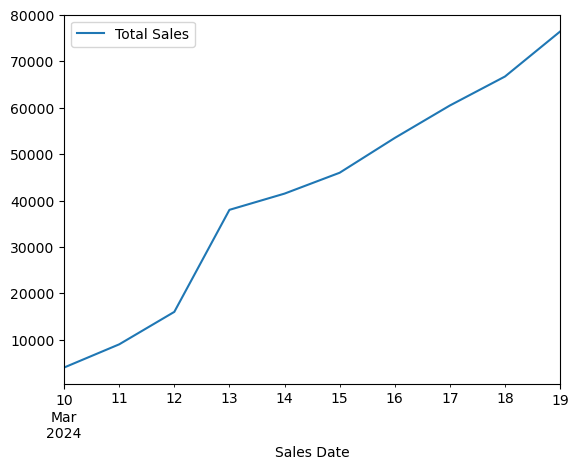

In [30]:
# let's plot the total sales
cars.plot(x='Sales Date',y='Total Sales');

In [31]:
import datetime
print(f'Made on {datetime.datetime.now()}')

Made on 2024-03-11 18:59:05.073481


numpy.int64

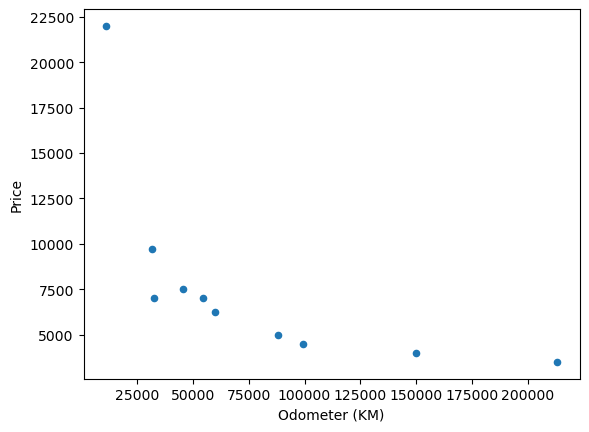

In [32]:
cars.Price=cars.Price.astype(int)
cars.plot(x='Odometer (KM)', y='Price', kind='scatter')
type(cars.Price[0])

In [33]:
#BAR GRAPH

x=np.random.rand(10,4)
x

#into a df

df = pd.DataFrame(x, columns=['a','b','c','d'])
df

,a,b,c,d
0,0.557396,0.516217,0.944117,0.668793
1,0.168991,0.345438,0.487023,0.310043
2,0.469875,0.249258,0.402039,0.342130
3,0.632488,0.568977,0.610711,0.579655
4,0.259524,0.762380,0.865802,0.629590
5,0.438966,0.486708,0.913929,0.612145
6,0.320153,0.417858,0.639918,0.732394
7,0.354716,0.455777,0.716480,0.616064
8,0.216557,0.099080,0.552485,0.343927
9,0.879502,0.079438,0.356390,0.162264


<Axes: >

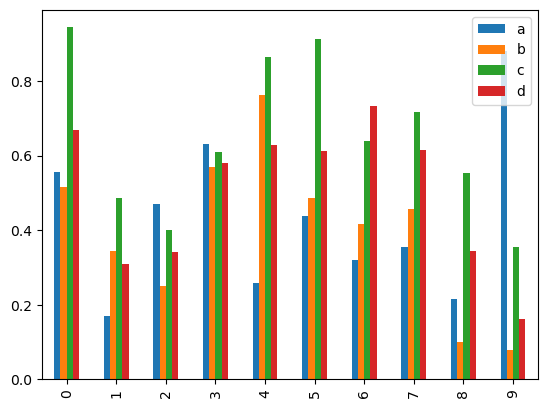

In [34]:
df.plot.bar()

<Axes: >

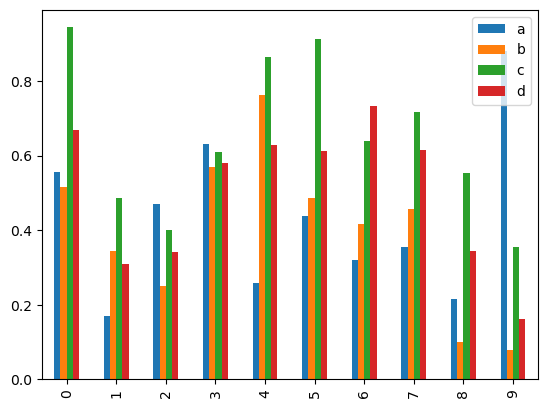

In [35]:
df.plot(kind='bar')

In [36]:
cars

,Make,Colour,Odometer (KM),Doors,Price,Sales Date,Total Sales
0,Toyota,White,150043,4,4000,2024-03-10,4000
1,Honda,Red,87899,4,5000,2024-03-11,9000
2,Toyota,Blue,32549,3,7000,2024-03-12,16000
3,BMW,Black,11179,5,22000,2024-03-13,38000
4,Nissan,White,213095,4,3500,2024-03-14,41500
5,Toyota,Green,99213,4,4500,2024-03-15,46000
6,Honda,Blue,45698,4,7500,2024-03-16,53500
7,Honda,Blue,54738,4,7000,2024-03-17,60500
8,Toyota,White,60000,4,6250,2024-03-18,66750
9,Nissan,White,31600,4,9700,2024-03-19,76450


<Axes: xlabel='Make'>

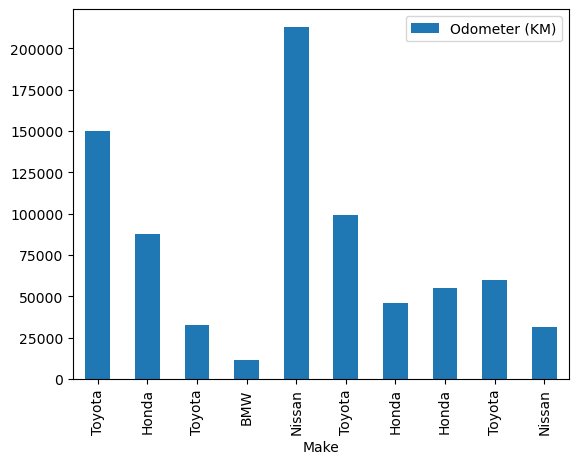

In [37]:
cars.plot(x='Make',y='Odometer (KM)',kind='bar')

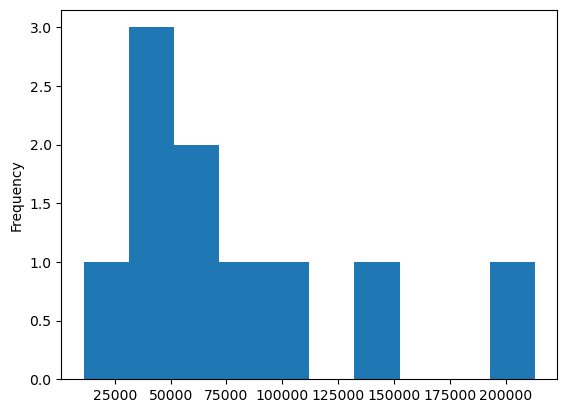

In [38]:
cars['Odometer (KM)'].plot.hist();

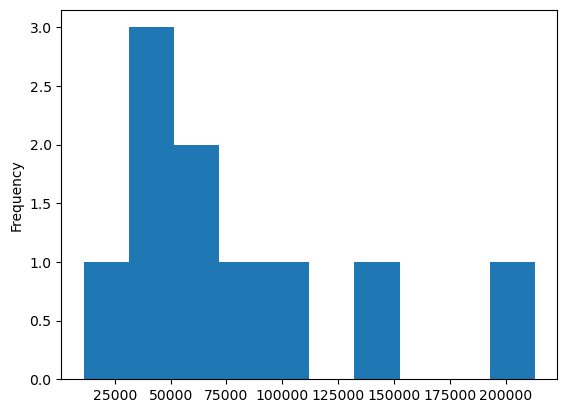

In [39]:
cars['Odometer (KM)'].plot(kind='hist');

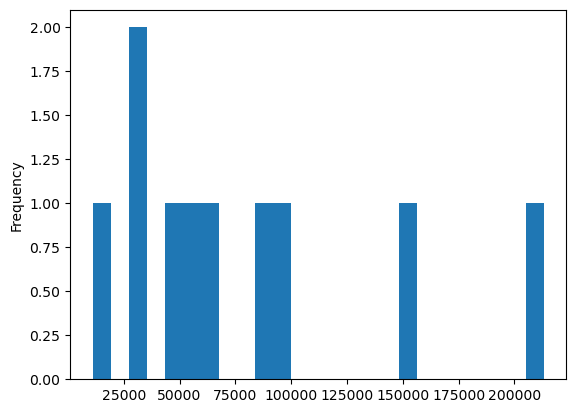

In [40]:
cars['Odometer (KM)'].plot.hist(bins=25);# bins=10 by default

### Trying on a different dataset - heartDisease

In [41]:
heart=pd.read_csv('heart-disease.csv')
heart.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


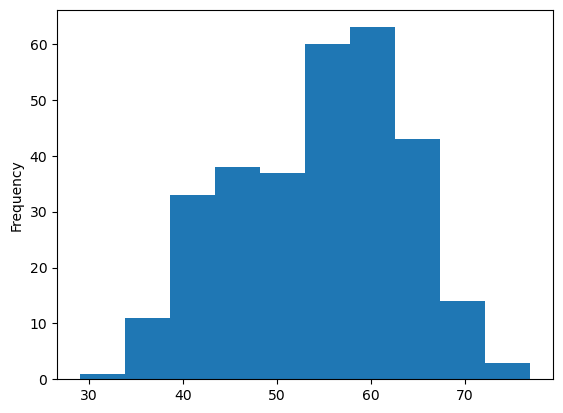

In [42]:
#create a histogram
heart['age'].plot.hist(bins=10);

In [43]:
heart.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


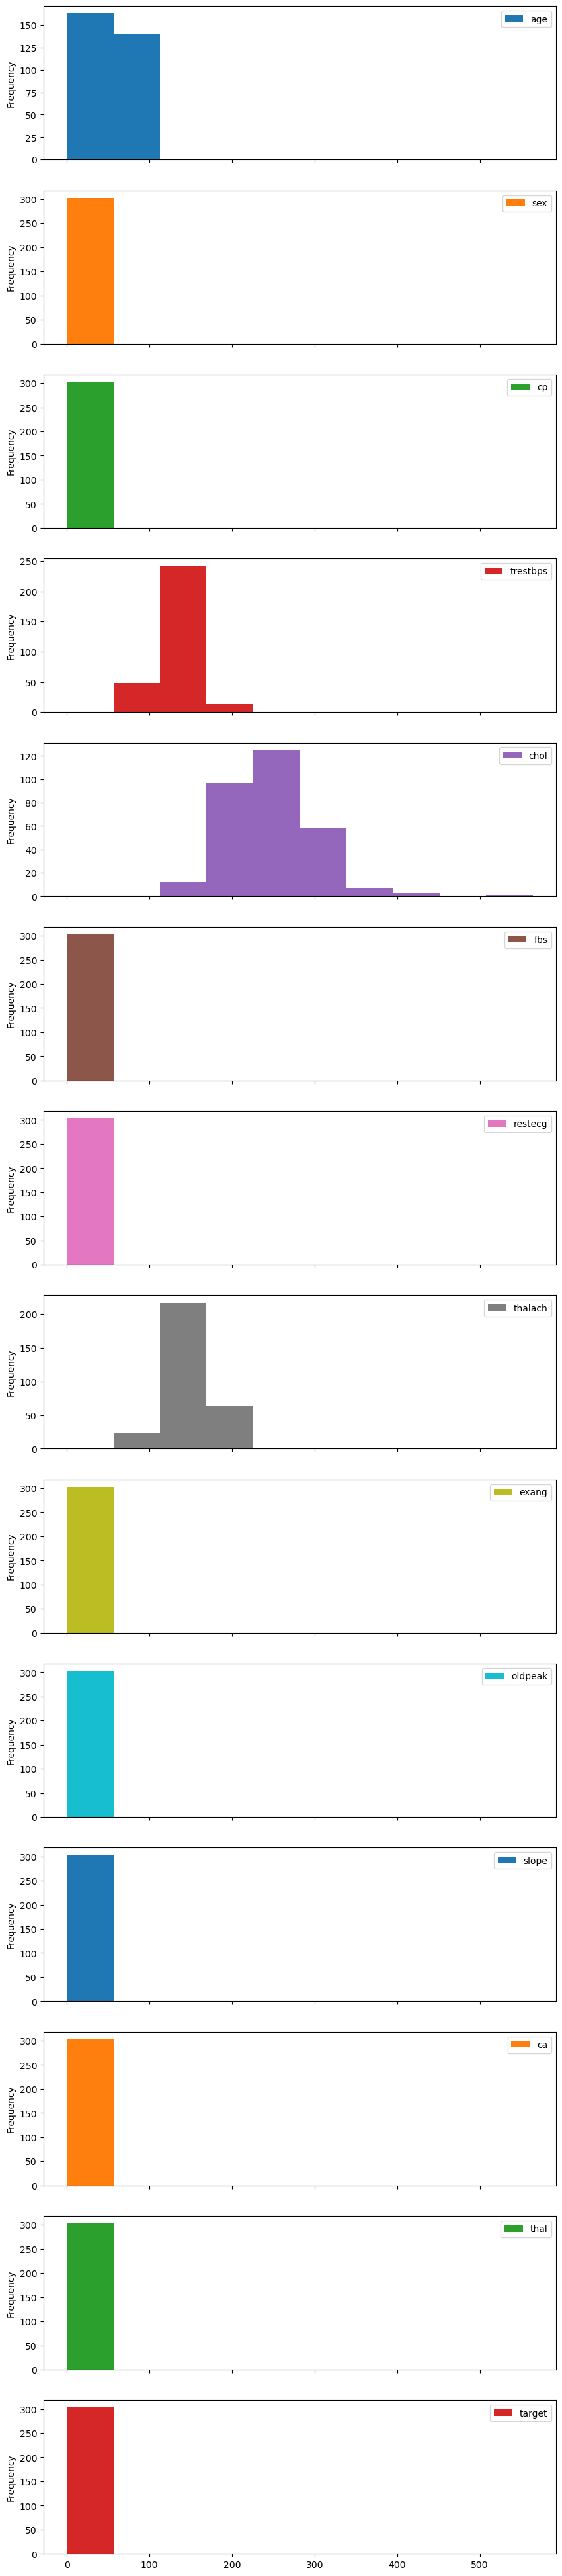

In [44]:
heart.plot.hist(figsize=(10,50),subplots=True);

In [45]:
#runs but not ideal
#thus, we have to pique the scales for different columns
# we can't plot directly at all times

### Using Object-Oriented method of plotting

# when to use what?
# pyplot or the matplotlib OO methods

* when plotting smth quickly, use pyplot
* for advanced stuff, use the OO method

In [46]:
heart.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [47]:
over_50=heart[heart.age >50]
over_50.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
5,57,1,0,140,192,0,1,148,0,0.4,1,0,1,1
6,56,0,1,140,294,0,0,153,0,1.3,1,0,2,1


In [48]:
len(over_50)

208

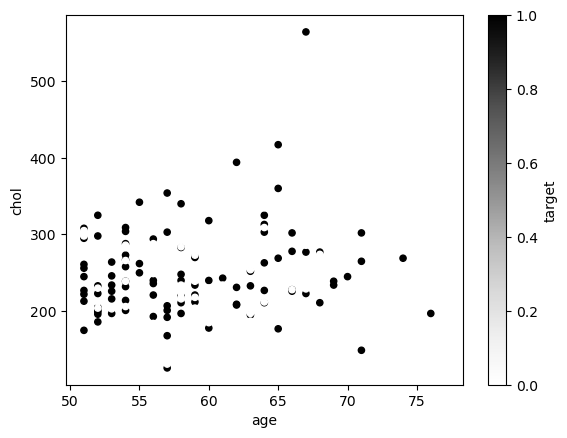

In [49]:
#pyplot method
over_50.plot(kind='scatter', x='age',y='chol', c='target');

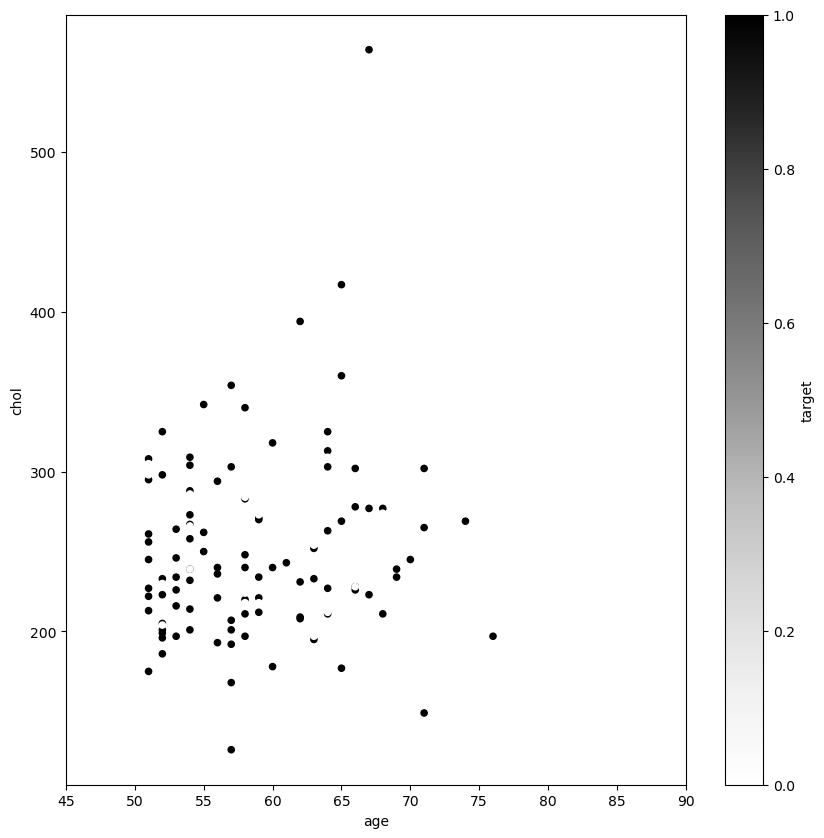

In [50]:
# OO method
fig, ax=plt.subplots(figsize=(10,10))
over_50.plot(kind='scatter',x='age',y='chol',c='target',ax=ax);

ax.set_xlim([45,90]); #limit axis scale

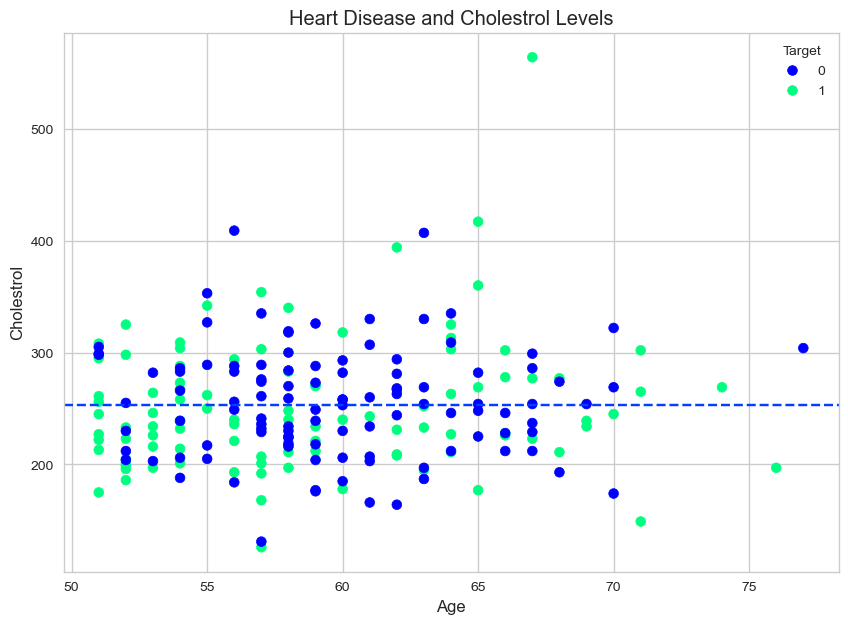

In [101]:
#set the plot style
plt.style.use('seaborn-v0_8-whitegrid')

# OO method from scratch
fig, ax=plt.subplots(figsize=(10,7))

#plot the data
scatter=ax.scatter(x=over_50.age, y=over_50.chol,c=over_50.target,cmap='winter');

#customize
ax.set(title='Heart Disease and Cholestrol Levels', xlabel='Age',ylabel='Cholestrol');

#add a legend
ax.legend(*scatter.legend_elements(), title='Target')

#add a horizontal line for avg chol
ax.axhline(over_50.chol.mean(),linestyle='--');

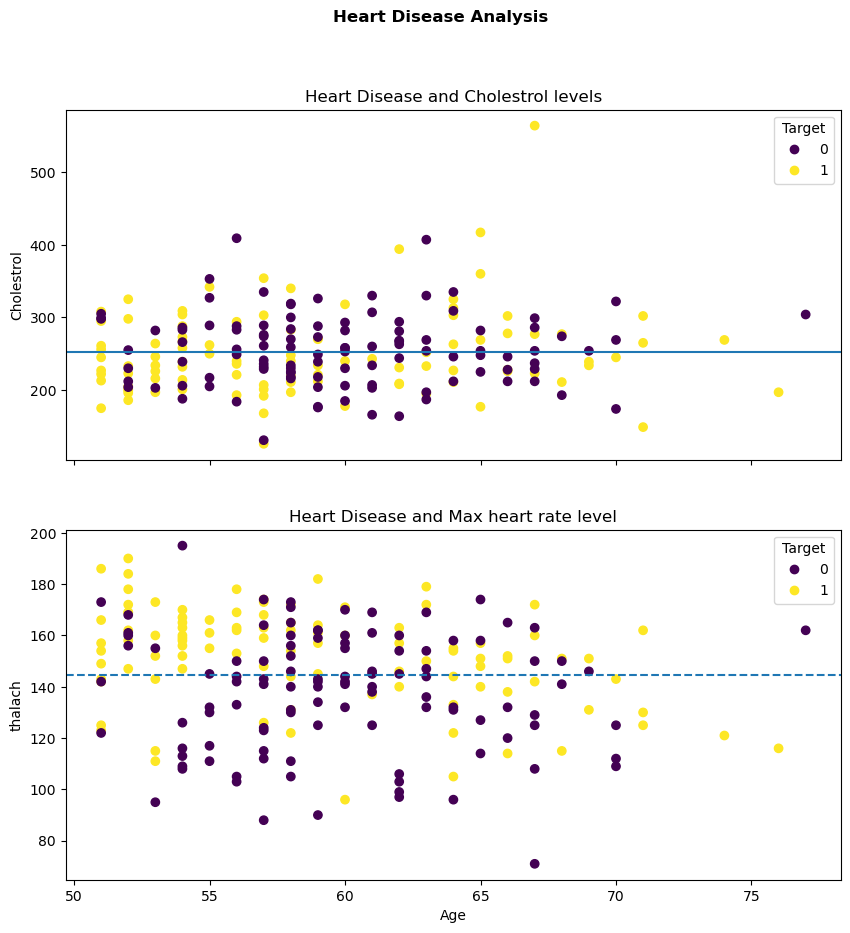

In [70]:
#subplot of chol, age and thalach

fig, (ax0, ax1) =plt.subplots(nrows=2,ncols=1,figsize=(10,10), sharex=True)
#add data
scatter=ax0.scatter(x=over_50.age, y=over_50.chol, c=over_50.target)

ax0.set(title='Heart Disease and Cholestrol levels', ylabel='Cholestrol')

ax0.legend(*scatter.legend_elements(), title='Target')

ax0.axhline(y=over_50.chol.mean())

scatter=ax1.scatter(x=over_50.age, y=over_50.thalach, c=over_50.target)

ax1.set(title='Heart Disease and Max heart rate level', xlabel='Age',ylabel='thalach')

ax1.legend(*scatter.legend_elements(),title='Target')

ax1.axhline(y=over_50.thalach.mean(),linestyle='--');


#add title to whole figure
fig.suptitle('Heart Disease Analysis', fontweight='bold');

### Customizing Matplotlib, #stylize

In [71]:
#see available styles
plt.style.available

['Solarize_Light2',
 '_classic_test_patch',
 '_mpl-gallery',
 '_mpl-gallery-nogrid',
 'bmh',
 'classic',
 'dark_background',
 'fast',
 'fivethirtyeight',
 'ggplot',
 'grayscale',
 'seaborn-v0_8',
 'seaborn-v0_8-bright',
 'seaborn-v0_8-colorblind',
 'seaborn-v0_8-dark',
 'seaborn-v0_8-dark-palette',
 'seaborn-v0_8-darkgrid',
 'seaborn-v0_8-deep',
 'seaborn-v0_8-muted',
 'seaborn-v0_8-notebook',
 'seaborn-v0_8-paper',
 'seaborn-v0_8-pastel',
 'seaborn-v0_8-poster',
 'seaborn-v0_8-talk',
 'seaborn-v0_8-ticks',
 'seaborn-v0_8-white',
 'seaborn-v0_8-whitegrid',
 'tableau-colorblind10']

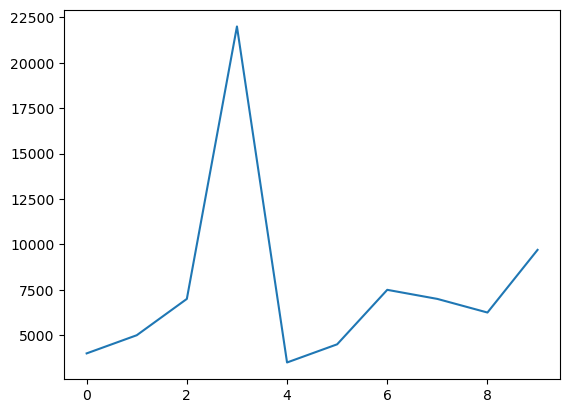

In [72]:
cars.Price.plot(); #default style

In [80]:
plt.style.use('seaborn-v0_8')


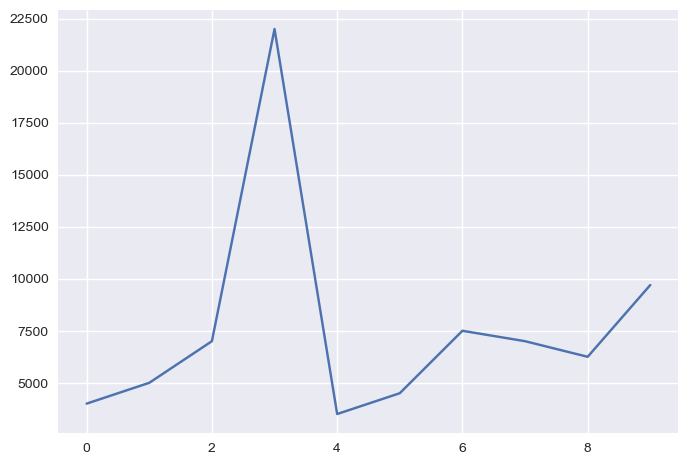

In [81]:
cars.Price.plot();

<Axes: xlabel='Odometer (KM)', ylabel='Price'>

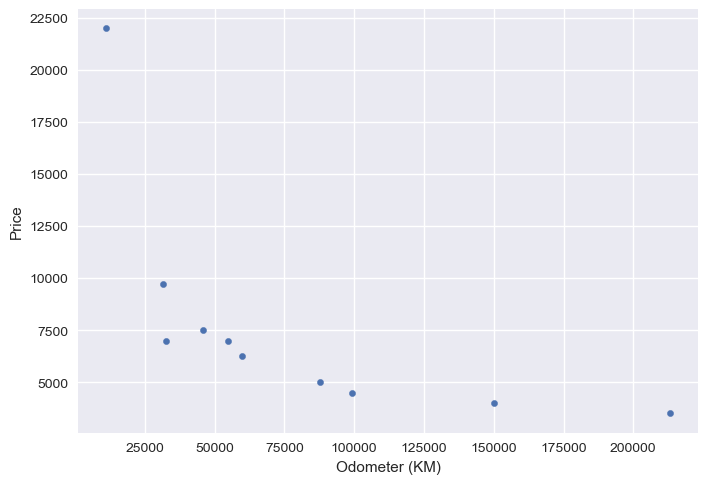

In [82]:
cars.plot(x='Odometer (KM)', y='Price', kind='scatter')

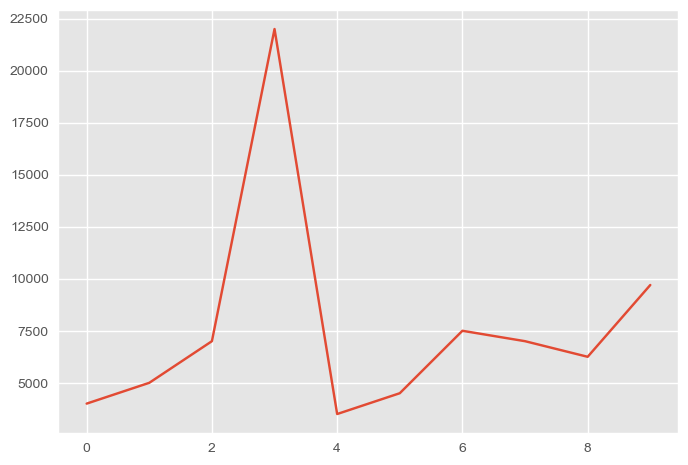

In [83]:
plt.style.use('ggplot')
cars.Price.plot();

In [85]:
x = np.random.randn(10,4)
x

array([[ 2.6887441 ,  0.06207528, -0.47105974,  0.13942242],
       [ 1.70685015,  0.32778789,  0.06646626,  2.29485215],
       [-2.48891458, -1.22401043,  0.58300745,  0.64375914],
       [-1.12200576, -0.13538656,  0.11735343,  0.86037423],
       [ 0.6960183 ,  1.17381353, -0.17736645,  2.60965296],
       [-1.63697095,  0.32247667, -1.29958854, -0.36826865],
       [ 0.36014471, -0.12177434,  0.15463038,  0.99768475],
       [-0.67620047, -1.04617406,  2.15771672, -0.04975681],
       [-0.30880734, -1.21830864, -0.02019849, -0.13851553],
       [ 0.50679448,  1.7376413 ,  0.22474702,  1.5870637 ]])

In [88]:
df = pd.DataFrame(x, columns=['a', 'b', 'c', 'd'])
df

,a,b,c,d
0,2.688744,0.062075,-0.471060,0.139422
1,1.706850,0.327788,0.066466,2.294852
2,-2.488915,-1.224010,0.583007,0.643759
3,-1.122006,-0.135387,0.117353,0.860374
4,0.696018,1.173814,-0.177366,2.609653
5,-1.636971,0.322477,-1.299589,-0.368269
6,0.360145,-0.121774,0.154630,0.997685
7,-0.676200,-1.046174,2.157717,-0.049757
8,-0.308807,-1.218309,-0.020198,-0.138516
9,0.506794,1.737641,0.224747,1.587064


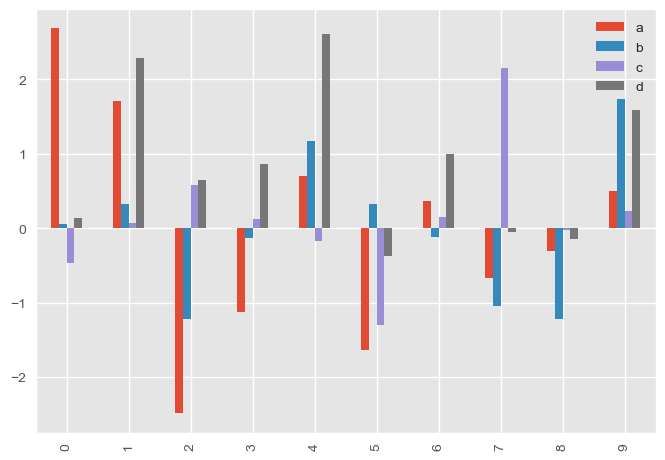

In [89]:
ax = df.plot(kind='bar')

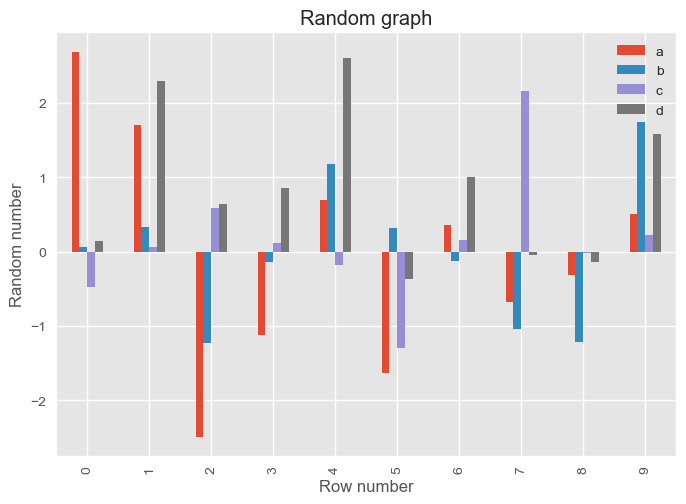

In [91]:
ax= df.plot(kind='bar');
ax.set(title='Random graph', xlabel='Row number', ylabel='Random number')
ax.legend().set_visible(True)

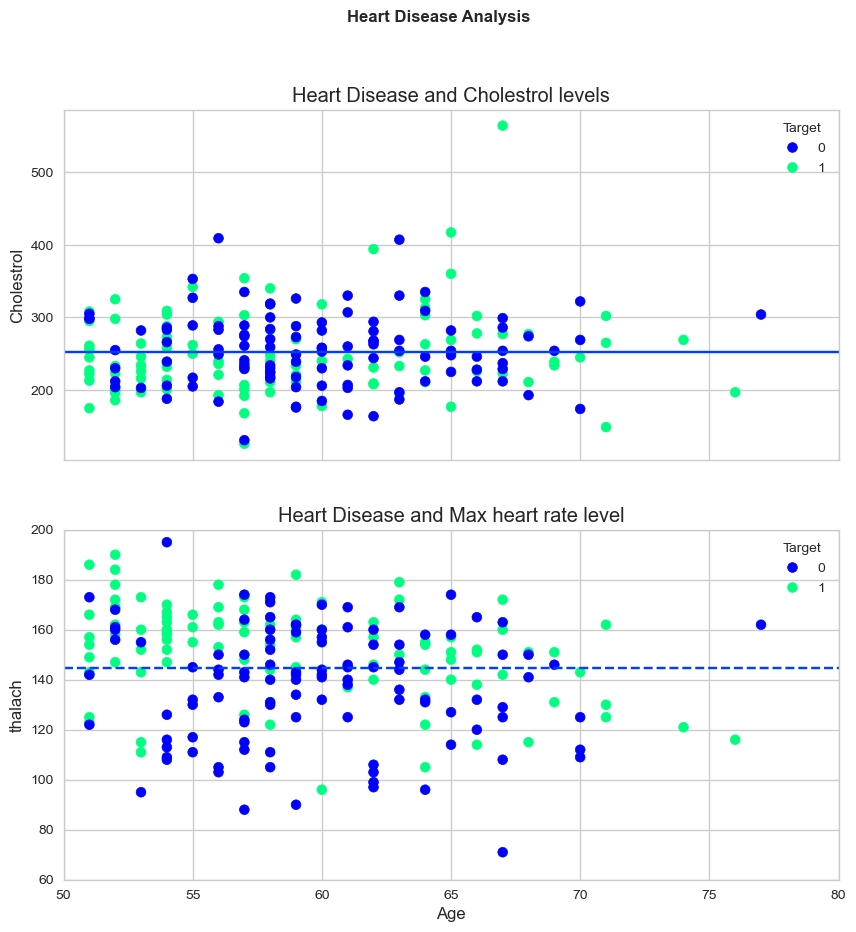

In [108]:
#customizing the y and x axes limitations

#subplot of chol, age and thalach

fig, (ax0, ax1) =plt.subplots(nrows=2,ncols=1,figsize=(10,10), sharex=True)
#add data
scatter=ax0.scatter(x=over_50.age, y=over_50.chol, c=over_50.target, cmap='winter')

ax0.set(title='Heart Disease and Cholestrol levels', ylabel='Cholestrol')

ax0.set_xlim([50,80])
ax1.set_ylim([60,200])

ax0.legend(*scatter.legend_elements(), title='Target')

ax0.axhline(y=over_50.chol.mean())

##########

scatter=ax1.scatter(x=over_50.age, y=over_50.thalach, c=over_50.target, cmap='winter')

ax1.set(title='Heart Disease and Max heart rate level', xlabel='Age',ylabel='thalach')

ax1.set_xlim([50,80])
ax1.set_ylim([60,200])

ax1.legend(*scatter.legend_elements(),title='Target')

ax1.axhline(y=over_50.thalach.mean(),linestyle='--');


#add title to whole figure
fig.suptitle('Heart Disease Analysis', fontweight='bold');

In [109]:
fig.savefig('hear-disease-plot-code.png')